In [1]:
# Hyper Parameters 
# ---> parameters whivh are not the part of the original data
# ---> the user can change it 
# ----> eg: criteria 

In [2]:
# hyperparameters tunning
#----> find the best combinations of the hyperparamters to build the best model

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
mp= pd.read_csv(r'D:\Imarticus Learning\DATASETS\train.csv')
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
from sklearn.model_selection import train_test_split
train_mp , test_mp= train_test_split(mp,test_size=.2)

train_mp_x=train_mp.iloc[:,0:-1]
train_mp_y=train_mp.iloc[:,-1]

test_mp_x=test_mp.iloc[:,0:-1]
test_mp_y=test_mp.iloc[:,-1]

In [5]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

search_dict= {'criterion':['gini','entropy'],
              'max_depth':[5,6,7,8,9],
              'min_samples_split':[25,50,75]}


In [6]:
dt=DecisionTreeClassifier()

In [7]:
grid=GridSearchCV(dt,search_dict)

In [8]:
grid.fit(train_mp_x,train_mp_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'min_samples_split': [25, 50, 75]})

In [9]:
pred=grid.predict(test_mp_x)

In [10]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=25)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
tab1=confusion_matrix(test_mp_y,pred)
tab1


array([[93,  9,  0,  0],
       [ 6, 85,  7,  0],
       [ 0,  9, 83, 10],
       [ 0,  0,  8, 90]], dtype=int64)

In [12]:
print(classification_report(test_mp_y, pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       102
           1       0.83      0.87      0.85        98
           2       0.85      0.81      0.83       102
           3       0.90      0.92      0.91        98

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [13]:
import matplotlib.pyplot as plt
from six import StringIO
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

In [14]:
dt=DecisionTreeClassifier(max_depth=4, criterion='entropy')
dt.fit(train_mp_x,train_mp_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

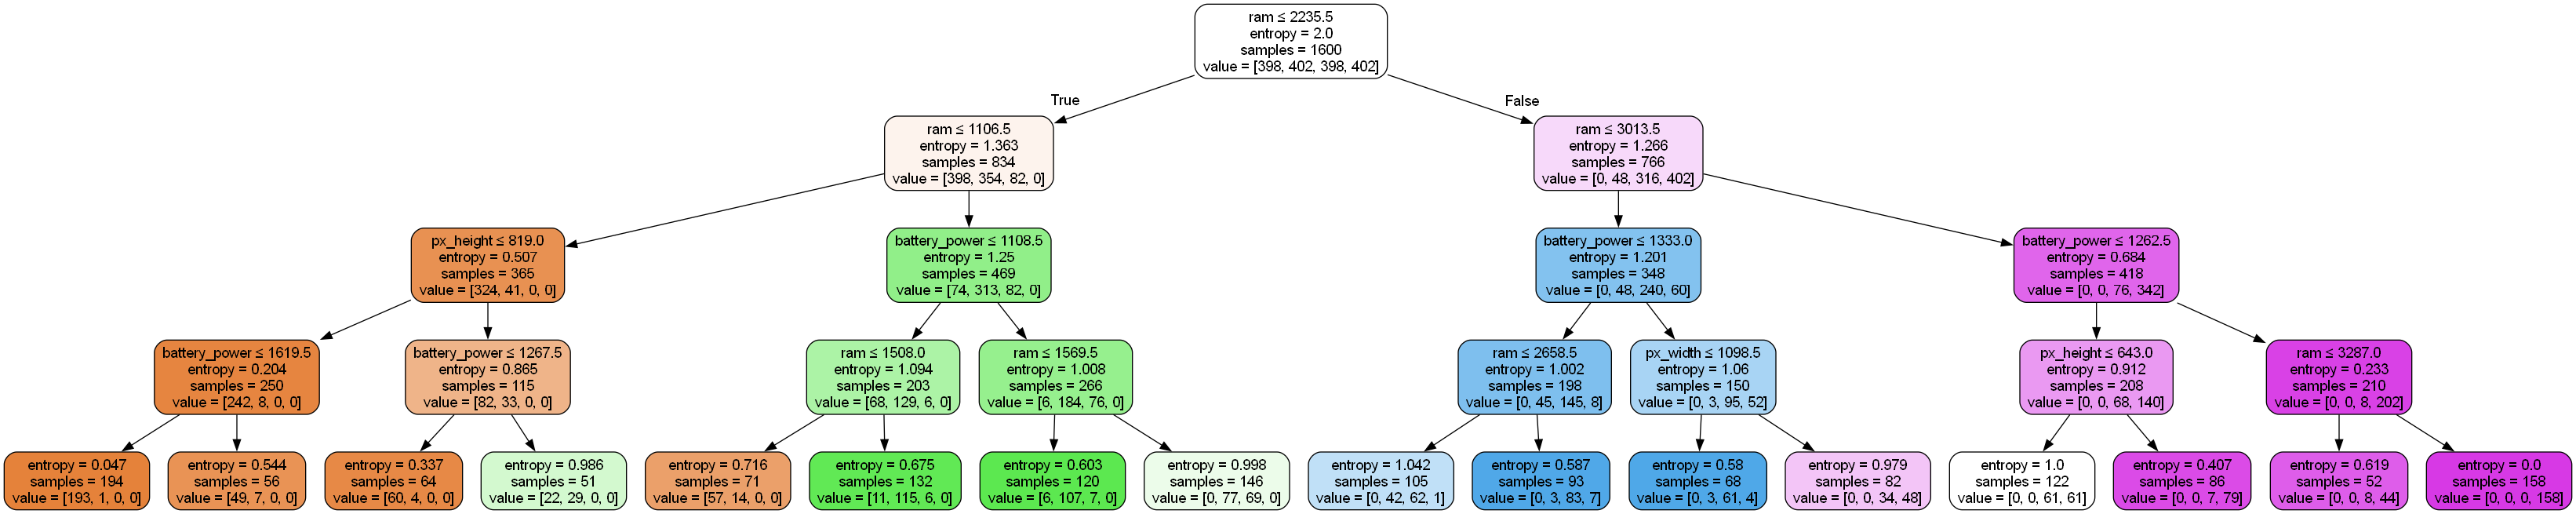

<Figure size 1200x1200 with 0 Axes>

In [15]:
dot_data=StringIO()
fig=plt.figure(figsize=(12,12))
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True,feature_names=train_mp_x.columns)
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [16]:
pip install pydot graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
